In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test_images/sharapova1.jpg')

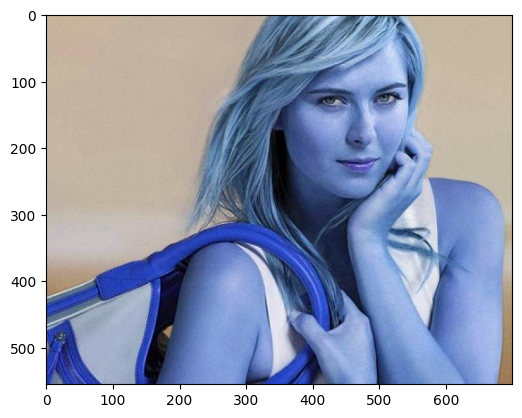

In [3]:
plt.imshow(img)

In [4]:
grey_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
grey_img.shape


(555, 700)

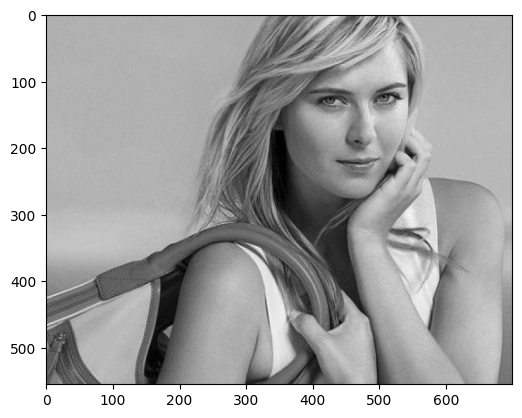

In [5]:
plt.imshow(grey_img,cmap='gray')

In [6]:
face_classifier = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
faces= face_classifier.detectMultiScale(grey_img,1.3,5)
eye_faces = face_classifier.detectMultiScale(grey_img,1.2,5)
faces

array([[352,  38, 233, 233]])

In [7]:
faces[0]

array([352,  38, 233, 233])

In [8]:
x,y,w,h = faces[0]

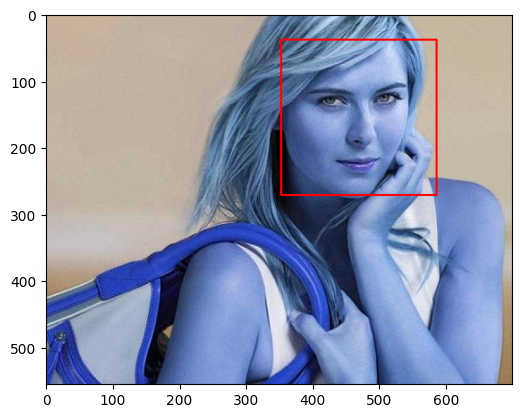

In [9]:
drawn=cv2.rectangle(img,(x,y),(x+h,y+w),(255,0,0),2)
plt.imshow(drawn)


In [10]:
def image_dec(img):
    cv2.destroyAllWindows()
    face_classifier = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
    eye_classifier = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
    grey_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces= face_classifier.detectMultiScale(grey_img,1.3,5)
    
    
    for( x,y,w,h) in faces:
        draw_face=cv2.rectangle(img,(x,y),(x+h,y+w),(255,255,255),2)
        roi_color=draw_face[y:y+h,x:x+w]
        roi_gray = grey_img[y:y+h,x:x+w]
        eye_faces = eye_classifier.detectMultiScale(roi_gray)

        for (ex,ey,eh,ew) in eye_faces:
            cv2.rectangle(roi_color,(ex,ey),(ex+eh,ey+ew),(0,0,0),2)
    plt.figure()
    plt.imshow(draw_face,cmap='gray')
    plt.show()
    

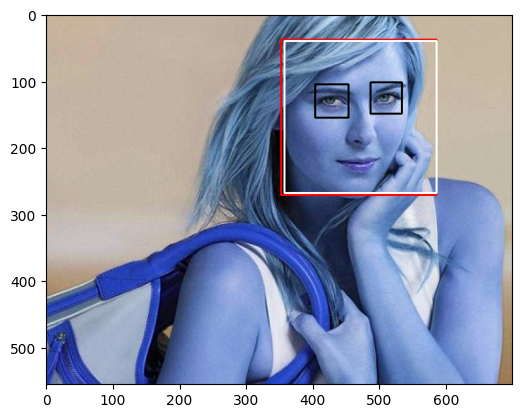

In [11]:
image_dec(img)

In [12]:
new_test_img = cv2.imread('./test_images/sharapova1.jpg')

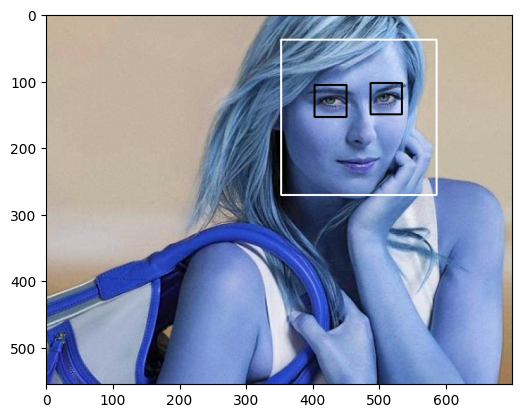

In [13]:
image_dec(new_test_img)

In [14]:
import os


In [15]:
def cropper(img_path):
    img = cv2.imread(img_path)
    gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    cv2.destroyAllWindows()
    face_classifier = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
    eye_classifier = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
    faces = face_classifier.detectMultiScale(gray_img,1.3,5)
    eye = eye_classifier.detectMultiScale(grey_img)
    for (x,y,h,w) in faces:
        roi_color=img[y:y+h,x:x+w]
        roi_gray = gray_img[y:y+h,x:x+w]
        eye = eye_classifier.detectMultiScale(roi_gray)
        if len(eye)==2:
            return roi_color
              

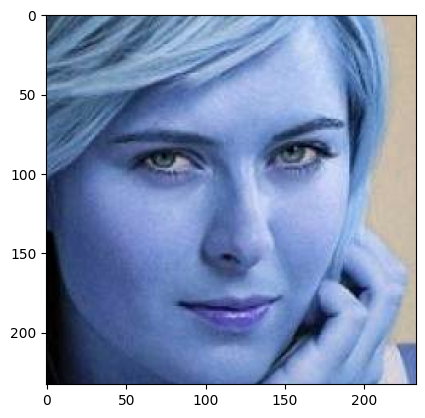

In [16]:
cropped=cropper('./test_images/sharapova1.jpg')
plt.imshow(cropped)

In [17]:
import os
dir_list=[]
dir_path = r'C:\Users\Sagar K.C\Desktop\programming\kproject2.o\images_dataset'

for dr in os.scandir(dir_path):
    if dr.is_dir():
        dir_list.append(dr.path)
    

In [18]:
dir_list

['C:\\Users\\Sagar K.C\\Desktop\\programming\\kproject2.o\\images_dataset\\lionel_messi',
 'C:\\Users\\Sagar K.C\\Desktop\\programming\\kproject2.o\\images_dataset\\maria_sharapova',
 'C:\\Users\\Sagar K.C\\Desktop\\programming\\kproject2.o\\images_dataset\\roger_federer',
 'C:\\Users\\Sagar K.C\\Desktop\\programming\\kproject2.o\\images_dataset\\serena_williams',
 'C:\\Users\\Sagar K.C\\Desktop\\programming\\kproject2.o\\images_dataset\\virat_kohli']

In [19]:
cr_path = './dataset/cropped_images/'
import shutil
if os.path.exists(cr_path):
    shutil.rmtree(cr_path)
os.mkdir(cr_path)

In [20]:
cr_path_names =[]
celeb_names_dict ={}

for img_dir in dir_list:
    count=1
    celeb_name = img_dir.split('\\')[-1]
    print(celeb_name)
    celeb_names_dict[celeb_name]= []
    for entry in os.scandir(img_dir):
        cropped_img = cropper(entry.path)
        if cropped_img is not None:
            cropped_folder = cr_path + '/' +celeb_name
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
            cr_file_name = celeb_name+str(count)+'.png'
            cr_path_name= cropped_folder+ '\\' +cr_file_name
            cv2.imwrite(cr_path_name,cropped_img)
            celeb_names_dict[celeb_name].append(cr_path_name)
            count+=1
            

lionel_messi
maria_sharapova
roger_federer
serena_williams
virat_kohli


In [21]:
import pywt

In [22]:
import numpy as np
import cv2
import pywt

def w2d(img,mode='haar',level=1):
    imarray=img
    imarray = cv2.cvtColor(imarray,cv2.COLOR_BGR2GRAY)
    imarray = np.float32(imarray)
    imarray/=255;
    coeffs = pywt.wavedec2(imarray,mode,level=level)
    coeffs_h = list(coeffs)
    coeffs_h[0]*=0
    image_h = pywt.waverec2(coeffs_h,mode)
    image_h*=255;
    image_h=np.uint32(image_h)
    return image_h
    

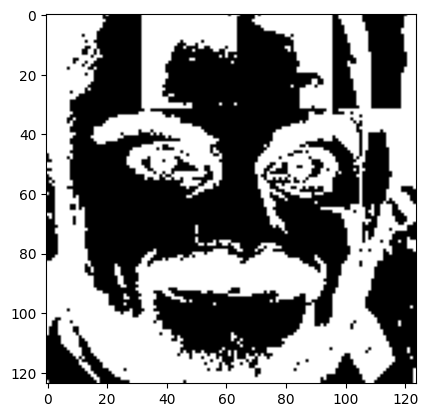

In [23]:
img = w2d(cropped_img,'db1',5)
plt.imshow(img,cmap='gray')

In [24]:
celeb_names_dict

{'lionel_messi': ['./dataset/cropped_images//lionel_messi\\lionel_messi1.png',
  './dataset/cropped_images//lionel_messi\\lionel_messi2.png',
  './dataset/cropped_images//lionel_messi\\lionel_messi3.png',
  './dataset/cropped_images//lionel_messi\\lionel_messi4.png',
  './dataset/cropped_images//lionel_messi\\lionel_messi5.png',
  './dataset/cropped_images//lionel_messi\\lionel_messi6.png',
  './dataset/cropped_images//lionel_messi\\lionel_messi7.png',
  './dataset/cropped_images//lionel_messi\\lionel_messi8.png',
  './dataset/cropped_images//lionel_messi\\lionel_messi9.png',
  './dataset/cropped_images//lionel_messi\\lionel_messi10.png',
  './dataset/cropped_images//lionel_messi\\lionel_messi11.png',
  './dataset/cropped_images//lionel_messi\\lionel_messi12.png',
  './dataset/cropped_images//lionel_messi\\lionel_messi13.png',
  './dataset/cropped_images//lionel_messi\\lionel_messi14.png',
  './dataset/cropped_images//lionel_messi\\lionel_messi15.png',
  './dataset/cropped_images//lion

In [25]:
celeb_names_dict.keys()

dict_keys(['lionel_messi', 'maria_sharapova', 'roger_federer', 'serena_williams', 'virat_kohli'])

In [26]:
celeb_id={}
count=0
for names in celeb_names_dict.keys():
    celeb_id[names]=count
    count+=1
celeb_id

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [27]:
x,y=[],[]
for image_name,img_paths in celeb_names_dict.items():
    for img_path in img_paths:
        image = cv2.imread(img_path)
        #image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        if image is None:
            continue
        pre_img = cv2.resize(image,(32,32))
        pre_img_haar = w2d(image,'db1',5)
        pre_img_haar = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        pre_img_haar = cv2.resize(pre_img_haar,(32,32))
        stacked_img=np.vstack((pre_img.reshape(32*32*3,1),pre_img_haar.reshape(32*32,1)))
        x.append(stacked_img)
        y.append(celeb_id[image_name])

In [28]:
len(x[0])

4096

In [29]:
X = np.array(x).reshape(len(x),4096).astype(float)

In [30]:
X.shape


(143, 4096)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [32]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0)

pipe = Pipeline((('standard',StandardScaler()),('svc',SVC(kernel='rbf',C=10))))

In [33]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('standard', StandardScaler()), ('svc', SVC(C=10))])

In [34]:
pipe.score(x_test,y_test)

0.6388888888888888

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [63]:
model_options={
    'logistic_reg':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C': [1,2,10]
        }
        
    },
       'RandomClassifier':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators': [50, 100, 150], 
            'max_depth': [None, 5, 10]
            
        }
        
    },
    'Decision Tree': {
        'model':DecisionTreeClassifier(),
        'params':{'max_depth': [None, 5, 10, 20]}
    },
       'SVC':{
        'model':SVC(),
        'params':{
            'C':[1,2,10],
            'kernel': ['linear', 'rbf']
            
        }
        
    }
    
}

In [64]:
import pandas as pd
from sklearn.pipeline import make_pipeline
scores=[]
best_estimators={}
scaler = StandardScaler()
for algos,md in model_options.items():
    m_pipe = make_pipeline(StandardScaler(),md['model'])
    clf= GridSearchCV(md['model'],md['params'],cv=5,return_train_score=False)
    X_train_scaled = scaler.fit_transform(x_train)
    X_test_scaled = scaler.transform(x_test)
    clf.fit(x_train,y_train)
    scores.append(
        {'model':algos,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_,}
    )
    best_estimators[algos]=clf.best_estimator_
df= pd.DataFrame(scores,columns=['model','best_score','best_params'])
df    

,model,best_score,best_params
0,logistic_reg,0.765801,{'C': 1}
1,RandomClassifier,0.785714,"{'max_depth': None, 'n_estimators': 150}"
2,Decision Tree,0.606494,{'max_depth': 5}
3,SVC,0.804762,"{'C': 10, 'kernel': 'rbf'}"


In [71]:
best_estimators['SVC'].score(x_test,y_test)

0.6666666666666666

In [72]:
best_estimators['logistic_reg'].score(x_test,y_test)

0.7777777777777778

In [73]:
best_estimators['Decision Tree'].score(x_test,y_test)

0.4166666666666667

In [74]:
best_estimators['RandomClassifier'].score(x_test,y_test)

0.6111111111111112